In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', False)
import seaborn as sns
sns.set_style("white")

#### Simulating the results of the model

We dont have a coin right now. So let us **simulate** this process on a computer. To do this we will use a form of the **random number generator** built into `numpy`. In particular, we will use the function `np.random.choice`, which will with equal probability for all items pick an item from a list (thus if the list is of size 6, it will pick one of the six list items each time, with a probability 1/6). 

In [2]:
def throw_a_coin(N):
    return np.random.choice(['H','T'], size=N)
throws=throw_a_coin(40)
print("Throws:"," ".join(throws))
print("Number of Heads:", np.sum(throws=='H'))
print("p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/40.)

Throws: H H H H T T H H T T T T H T H H H H H T T T T H H H T T H T H T T T T T H H T T
Number of Heads: 19
p1 = Number of Heads/Total Throws: 0.475


Notice that you do not necessarily get 20 heads.

Now say that we run the entire process again, a second **replication** to obtain a second sample. Then we ask the same question: what is the fraction of heads we get this time? Lets call the odds of heads in sample 2, then, $p_2$:

In [3]:
def make_throws(N):
    throws=throw_a_coin(N)
    if N <= 100:
        print("Throws:"," ".join(throws))
    else:
        print("First 100 Throws:"," ".join(throws[:100]))
    print("Number of Heads:", np.sum(throws=='H'))
    print("p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/N)
make_throws(40)

Throws: T T H H H T H T T T H H T H T T H H H H H T H H H H T H T H T T T H H H T H H T
Number of Heads: 23
p1 = Number of Heads/Total Throws: 0.575


Let's do many more trials

In [4]:
make_throws(1000)

First 100 Throws: H H H H H T H T H T T T H H H T H H T T T T H H T H H H H T T H H T H H H H H H H T T H H H H T H T T T T H H T T H T H H T T H H T H H T T H T T T H T T T H T T T H H T T T H H T H H T T T T T H H H
Number of Heads: 499
p1 = Number of Heads/Total Throws: 0.499


And even more:

In [5]:
make_throws(10000)

First 100 Throws: H H T H H T H T H H T H T H H T H H T T T H H H H H T H T H T T H H T H H H T H T T T T H H T H T H T H T H T H T H H T T T H H H H T T H T H T H T H H T H H T H T T T T H H T H H H T H H T H H T T T
Number of Heads: 4965
p1 = Number of Heads/Total Throws: 0.4965


As you can see, the larger number of trials we do, the closer we seem to get to half the tosses showing up heads. Lets see this more systematically:

C:\Users\Will\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


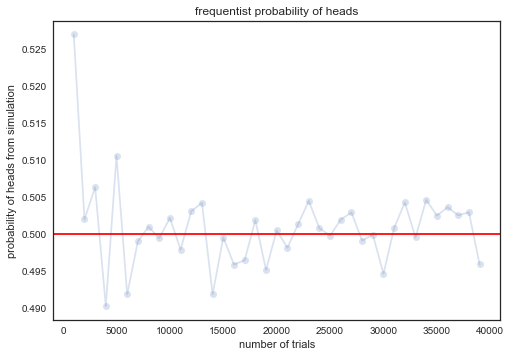

In [6]:
trials=np.arange(0, 40000, 1000)
plt.plot(trials, [np.sum(throw_a_coin(j)=='H')/np.float(j) for j in trials], 'o-', alpha=0.2);
plt.axhline(0.5, 0, 1, color='r');
plt.xlabel('number of trials');
plt.ylabel('probability of heads from simulation');
plt.title('frequentist probability of heads');

Thus, the true odds **fluctuate** about their long-run value of 0.5, in accordance with the model of a fair coin (which we encoded in our simulation by having `np.random.choice` choose between two possibilities with equal probability), with the fluctuations becoming much smaller (we shall talk a lot more about this later in the book). These **fluctations** are what give rise to probability distributions.

Each finite length run is called a **sample**, which has been obtained from the **generative** model of our fair coin. Its called generative as we can use the model to generate, using simulation, a set of samples we can play with to understand a model. Such **simulation from a model** is a key technique which we will come back to again and again in learning from data.